#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [179]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
dfFlower = pd.read_csv(url)
dfFlower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [180]:
dfFlower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [181]:
dfFlower.duplicated().any()

True

In [182]:
#all yg duplicates
duplicates = dfFlower[dfFlower.duplicated(subset=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], keep=False)]
duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [183]:
dfFlower.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Periksa apakah ada missing values

In [184]:
dfFlower.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

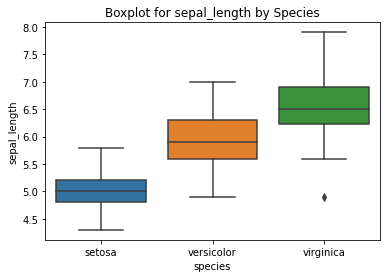

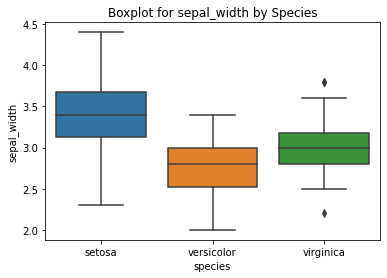

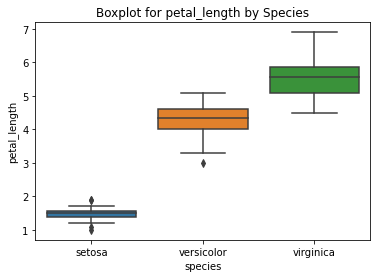

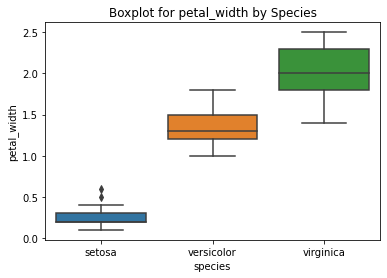

In [185]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature_column in feature_columns:
    #boxplot terpisah for every target variable
    sns.boxplot(x='species', y=feature_column, data=dfFlower)
    
    plt.title(f'Boxplot for {feature_column} by Species')
    plt.show()

In [186]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#deleting
for feature_column in feature_columns:
    dfFlower = remove_outliers(dfFlower, feature_column)

In [187]:
dfFlower.shape

(146, 5)

Karena outliersnya hanya sedikit berbeda/tidak terlau ekstrim dengan data lainnya, maka saya memutuskan untuk menghapus 
outlier tersebut

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [188]:
y = dfFlower['species'] #dependen/target
X = dfFlower.drop('species', axis=1) #independen
print(y.head())
print("----------------")
print(X.head())

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object
----------------
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state = 42)
print ('Train set:', X_train.head(),  y_train.head())
print("jmlh data training:", len(X_train))
print("----------------")
print ('Test set:', X_test.head(),  y_test.head())
print("jmlh data testing:", len(X_test))

Train set:      sepal_length  sepal_width  petal_length  petal_width
39            5.1          3.4           1.5          0.2
64            5.6          2.9           3.6          1.3
143           6.8          3.2           5.9          2.3
31            5.4          3.4           1.5          0.4
58            6.6          2.9           4.6          1.3 39         setosa
64     versicolor
143     virginica
31         setosa
58     versicolor
Name: species, dtype: object
jmlh data training: 131
----------------
Test set:      sepal_length  sepal_width  petal_length  petal_width
48            5.3          3.7           1.5          0.2
101           5.8          2.7           5.1          1.9
28            5.2          3.4           1.4          0.2
20            5.4          3.4           1.7          0.2
45            4.8          3.0           1.4          0.3 48        setosa
101    virginica
28        setosa
20        setosa
45        setosa
Name: species, dtype: object
jmlh data

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

scaler.fit(X_test)
scaled_X_test = scaler.transform(X_test)

scaled_X_train
scaled_X_test

array([[-0.50072244,  1.53220709, -1.04448314, -1.02689051],
       [ 0.23563409, -1.05016441,  1.02152746,  0.9720185 ],
       [-0.64799375,  0.75749564, -1.10187232, -1.02689051],
       [-0.35345113,  0.75749564, -0.92970477, -1.02689051],
       [-1.23707897, -0.27545296, -1.10187232, -0.90930763],
       [ 1.56107584,  0.49925849,  1.36586256,  1.20718426],
       [-1.23707897, -0.01721581, -0.98709395, -1.02689051],
       [-0.35345113, -0.27545296,  0.67719236,  0.50168697],
       [ 0.38290539,  0.24102134,  0.84935991,  0.85443561],
       [-0.79526505,  1.79044424, -1.04448314, -0.90930763],
       [-1.23707897, -0.27545296, -1.10187232, -1.14447339],
       [ 0.5301767 , -2.34135016,  0.96413828,  0.50168697],
       [ 1.56107584, -0.27545296,  1.07891665,  1.44235003],
       [ 0.23563409, -1.05016441,  0.33285726,  0.14893832],
       [ 1.85561845, -0.01721581,  1.02152746,  1.44235003]])

# Logistic Regression

Bangun model dan ukur accuracy nya

In [191]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(scaled_X_train,y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [192]:
y_pred = classifier.predict(scaled_X_test)
print(y_pred)

['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica']


In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Confusion matrix
[[7 0 0]
 [0 1 2]
 [0 0 5]]
Accuracy score: 0.8666666666666667


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [194]:
gaussian = GaussianNB()
gaussian.fit(scaled_X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [195]:
y_predG = gaussian.predict(scaled_X_test) 
print(y_predG)

['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'versicolor' 'virginica' 'setosa' 'setosa' 'virginica' 'virginica'
 'versicolor' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [196]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_predG))

accuracy = accuracy_score(y_test, y_predG)
print("Accuracy score:", accuracy)

Confusion matrix
[[7 0 0]
 [0 2 1]
 [0 0 5]]
Accuracy score: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [197]:
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)
knn_model

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [198]:
knn_model.fit(scaled_X_train, y_train)
y_predKNN = knn_model.predict(scaled_X_test)
print(y_predKNN)

['setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [199]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_predKNN))

accuracy = accuracy_score(y_test, y_predKNN)
print("Accuracy score:", accuracy)

Confusion matrix
[[7 0 0]
 [0 1 2]
 [0 1 4]]
Accuracy score: 0.8


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah Naive bayes.